# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
!pip install palmerpenguins

In [3]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   ------------------- -------------------- 4.2/8.7 MB 15.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 17.9 MB/s  0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- ---------

In [4]:
import pandas as pd
import numpy as np
import sklearn
from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# import + print first few rows
penguins_df = load_penguins()
penguins_df.head()

C:\Users\sydne\AppData\Local\Programs\Python\Python313\Lib\site-packages\palmerpenguins\penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# new table with categorical dummies
# categorical variables - species, island, sex, year
penguins = pd.get_dummies(penguins_df)
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
# Code Here

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Drop rows with missing values in 'bill_length_mm' or 'bill_depth_mm'
data = penguins_df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

# Select the features (X) and target (y)
X = data[['bill_length_mm']]
y = data['bill_depth_mm']

# fitting the regression model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# for quadratic

data["bill_length_mm_sq"] = data["bill_length_mm"] ** 2

sq_model = LinearRegression()
sq_model.fit(
    X = data[["bill_length_mm", "bill_length_mm_sq"]],
    y = data["bill_depth_mm"]
)

# for cubic

data["bill_length_mm_cub"] = data["bill_length_mm"] ** 3

cub_model = LinearRegression()
cub_model.fit(
    X = data[["bill_length_mm", "bill_length_mm_sq", "bill_length_mm_cub"]],
    y = data["bill_depth_mm"]
)

# for degree 10
# Generate all polynomial features up to degree 10
X_deg10 = data[["bill_length_mm"]].copy() # Start with the original feature
for i in range(2, 11):
    X_deg10[f"bill_length_mm_{i}"] = data["bill_length_mm"] ** i

deg10_model = LinearRegression()
# Select all polynomial features up to degree 10
deg10_model.fit(
    X = X_deg10,
    y = data["bill_depth_mm"]
)

print()

<positron-console-cell-7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
sq_model.coef_, sq_model.intercept_

(array([-1.42149289,  0.0151644 ]), np.float64(49.88100322111957))

In [9]:
cub_model.coef_, cub_model.intercept_

(array([ 7.00494111e+00, -1.74355549e-01,  1.40554271e-03]),
 np.float64(-73.59178504895354))

In [10]:
deg10_model.coef_, deg10_model.intercept_

(array([ 9.20270004e-14,  4.05935127e-12,  1.54316486e-10,  3.99369189e-09,
         7.58162706e-08,  8.32820273e-07, -5.95935634e-08,  1.61049202e-09,
        -1.94392298e-11,  8.82283808e-14]),
 np.float64(-20.898873599573957))

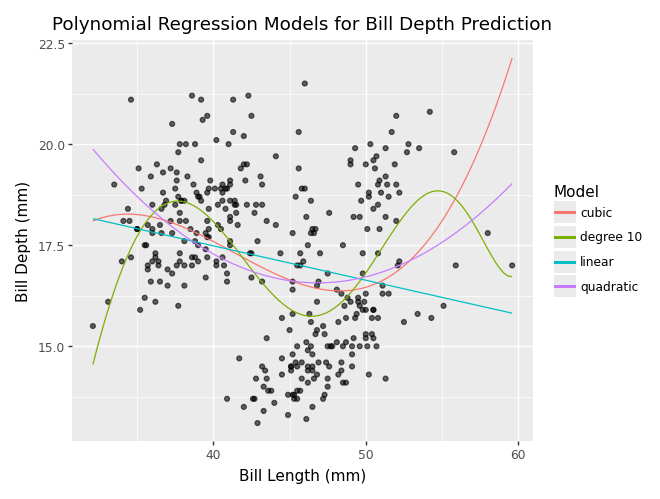

In [11]:
# plot

from plotnine import *
import pandas as pd
import numpy as np

# Create a DataFrame for plotting fitted lines
X_new = pd.DataFrame({
    "bill_length_mm": np.linspace(data["bill_length_mm"].min(), data["bill_length_mm"].max(), num=100)
})

# Simple linear regression predictions
y_linear = model.predict(X_new[["bill_length_mm"]])

# Quadratic predictions
X_new["bill_length_mm_sq"] = X_new["bill_length_mm"] ** 2
y_sq = sq_model.predict(X_new[["bill_length_mm", "bill_length_mm_sq"]])

# Cubic predictions
X_new["bill_length_mm_sq"] = X_new["bill_length_mm"] ** 2 # Recalculate for X_new
X_new["bill_length_mm_cub"] = X_new["bill_length_mm"] ** 3
y_cub = cub_model.predict(X_new[["bill_length_mm", "bill_length_mm_sq", "bill_length_mm_cub"]])

# Degree 10 predictions
# Generate all polynomial features up to degree 10 for X_new
X_new_deg10 = X_new[["bill_length_mm"]].copy() # Create a copy to avoid modifying X_new in place
for i in range(2, 11):
    X_new_deg10[f"bill_length_mm_{i}"] = X_new_deg10["bill_length_mm"] ** i

y_deg10 = deg10_model.predict(X_new_deg10)


# Combine predictions into a single DataFrame for plotting
plot_data = pd.DataFrame({
    "bill_length_mm": np.tile(X_new["bill_length_mm"], 4),
    "bill_depth_mm": np.concatenate([y_linear, y_sq, y_cub, y_deg10]),
    "model": np.repeat(["linear", "quadratic", "cubic", "degree 10"], len(X_new))
})

# Plot
data_plot = (ggplot(data,
                    aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point(alpha = 0.6)
+ geom_line(plot_data, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "model"))
+ labs(title = "Polynomial Regression Models for Bill Depth Prediction",
       x = "Bill Length (mm)", y = "Bill Depth (mm)")
+ scale_color_discrete(name = "Model")
)

data_plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

I think the linear model is underfitting the data. The straight line doesn't capture the trend very well.

I believe the degree 10 polynomial model is overfitting the data. It's trying to fit the trend too well.

I think the quadratic and cubic models are better options. These models capture the general curve of the data better.